# Parallelizing Neural Network Training with TensorFlow

In this chapter, we will move on from the mathematical foundations of machine learning and deep learning to introduce TensorFlow. TensorFlow is one of the most popular deep learning libraries currently available, and it can let us implement neural networks much more efficiently than any of our previous NumPy implementations. In this chapter, we will start using TensorFlow and see how it brings significant benefits to training performance. 

This chapter begins the next stage of our journey into training machine learning and deep learning, and we will explore the following topics:

* How TensorFlow improves training performance
* Working with TensorFlow to write optimized machine learning code
* Using TensorFlow high-level APIs to build a multilayer neural network
* Choosing activation functions for artificial neural networks
* Introducing Keras, a high-level wrapper around TensorFlow, for implementing common deep learning architectures most conveniently

# TensorFlow and training performance

TensorFlow can speep up our machine learning tasks significantly. To understand how it can do this, let's begin by discussing some of the performance challenges we typically run into when we run expensive calculations on our hardware. 

The performance of computer processors has, of course, been improving continuously over recent years, and that has allowed us to train more powerful and complex learning systems, and so to improve the predictive performance of our machine learning models. Even the cheapest desktop computer hardware that is available right now comes with processing units that have multiple cores. 

Also, in the previous chapter, we saw that many functions in scikit-learn allowed us to spread those computations over multiple processing units. However, by default, Python is limited to execution on one core due to the **Global Interpreter Lock (GIL)**. So, although we, indeed, take advantage of its multiprocessing library to distribute our computations over multiple cores, we still have to consider that the most advanced desktop hardware rarely comes with more than 8 or 16 such cores. 

If we recall from the previous chapter, where we implemented a very simple multilayer perceptron with only one hidden layer consisting of 100 units, we had to optimize approximately 80,000 weight parameters ([784\*100 + 100] + [100 \* 10] + 10 = 79,510) to learn a model for a very simple image classification task. The images in MNIST are rather small (28 x 28 pixels), and we can only imagine the explosion in the number of parameters if we want to add additional hidden layers or work with images that have higher pixel densities. 

Such a task would quickly become unfeasible for a single processing unit. The question then becomes - how can we tackle such problems more effectively?

The obvious solution to this problem is to use GPUs, which are real work horses. You can think of a graphics card as a small computer cluster inside your machine. Another advantage is that modern GPUs are relatively cheap compared to the state-of-the-art CPUs, as we can see in the following overview:

<img src='images/13_05.png'>

At 70 percent of the price of a modern CPU, we can get a GPU that has 450 times more cores and is capable of around 15 times more floating-point calculations per second. So, what is holding us back from utilizing GPUs for our machine learning tasks?

The challenge is that writing code to target GPU is not as simple as executing Python code in our interpreter. There are special packages, such as CUDA and OpenCL, that allows us to target the GPU. However, writing code in CUDA or OpenCL is probably not the most convenient environment for implementing and running machine learning algorithms. The good news is that this is what TensorFlow was developed for!

# What is TensorFlow?

TensorFlow is a scalable and multiplataform programming interface for implementing and running machine learning algorithms, including convenience wrappers for deep learning. 

TensorFlow was developed by the researchers and engineers of the Google Brain team; and while the main development is led by a team of researchers and software engineers at Google, its development also involves many contributions from the open source community. TensorFlow was initially built for only internal use at Google, but it was subsequently released in November 2015 under a permissive open source license. 

To improve the performance of training machine learning models, TensorFlow allows execution on both CPUs and GPUs. However, its greatest performance capabilities can be discovered when using GPUs. TensorFlow supports CUDA-enabled GPUs officially. Support for OpenCL-enabled devices is still experimental. However, OpenCL will likely be officially supported in near future. 

TensorFlow currently supports frontend interfaces for a number of programming languages. Luckly for us as Python users, TensorFlow's Python API is currently the most complete API, thereby attracting many machine learning and deep learning practitioners. Furthermore, TensorFlow has an official API in C++.

The APIs in other languages, such as Java, Haskell, Node.js, and Go, are not stable yet, but the open source community and TensorFlow developers are constantly improving them. TensorFlow computations rely on constructing a directed graph for representing the data flow. Even though building the graph may sound complicated, TensorFlow comes with high-level APIs that has made it very easy. 

# How we will learn TensorFlow

We will learn first of all about the low-level TensorFlow API. While implementing models at this level can be a little bit cumbersome at first, the advantage of the low-level API is that it gives us more flexibility as programmers to combine the basic operations and develop complex machine learning models. Starting from TensorFlow version 1.1.0, high-level APIs are added on top of the low-level API (for instance, the so-called Layers and Estimators API), which allow building and prototyping models much faster.

After learning about the low-level API, we will move forward to explore two high-level APIs, namely TensorFlow **Layers** and **Keras**. However, let's begin by taking our first steps with TensorFlow low-level API, and ease ourselves into how everything works. 

# First steps with TensorFlow

In this section, we will take our first steps in using the low-level TensorFlow API. Depending on how your system is set up ,you can typically just use Python's *pip* installed and install TensorFlow from PyPI by executing *pip install tensorflow* command from your terminal. 

In case you want to use GPUs, the CUDA toolkit as well as the NVIDIA cuDNN library need to be installed; then you can install TensorFlow with GPU support by executing *pip install tensorflow-gpu*.

TensorFlow is built around a computation graph composed of a set of nodes. Each node represents an operation that may have zero or more input or output. The values that flow through the edges of the computation graph are called **tensors**. 

Tensors can be understood as a generalization of scalars, vectors, matrices, and so on. More concretely, a scalar can be defined as a rank-0 tensor, a vector as a rank-1 tensor, a matrix as a rank-2 tensor, and matrices stacked in a third dimension as rank-3 tensors. 

Once a computation graph is built, the graph can be launched in a TensorFlow *Session* for executing different nodes of the graph. In a next chapter, we will cover the steps in building the computation graph and launching the graph in a session in more detail. 

As a warm-up exercise, we will start with the use of simple scalars from TensorFlow to compute a net input $z$ of a sample point $x$ in a one-dimensional dataset with weight $w$ and bias $b$:

$z = w \times x + b$

The following code shows the implementation of this equation in the low-level TensorFlow API:

In [1]:
import tensorflow as tf

## create a graph
g = tf.Graph()

with g.as_default():
    x = tf.placeholder(dtype=tf.float32, shape=(None), 
                       name='x')
    w = tf.Variable(2.0, name='weight')
    b = tf.Variable(0.7, name='bias')
    
    z = w*x + b
    
    init = tf.global_variables_initializer()
    
## create a session and pass in graph g
with tf.Session(graph=g) as sess:
    ## initialize w anb b:
    sess.run(init)
    ## evaluate z:
    for t in [1.0, 0.6, -1.8]:
        print('x=%4.1f --> z=%4.1f'
              % (t, sess.run(z, feed_dict={x:t})))

x= 1.0 --> z= 2.7
x= 0.6 --> z= 1.9
x=-1.8 --> z=-2.9


This was pretty straightforward, right? In general, when we develop for a model in the TensorFlow low-level API, we need to define placeholders for input data ($x$, $y$, and sometimes other tunable parameters); then, define the weight matrices and build the model from input to output. If this is an optimization problem, we should define the loss or cost function and determine which optimization algorithm to use. TensorFlow will create a graph that contains all the symbols that we have defined as nodes in this graph. 

Here, we created a placeholder for $x$ with *shape=(None)*. This allows us to feed the values in an element-by-element form and as a batch of input data at once, as follows:

In [2]:
with tf.Session(graph=g) as sess:
    sess.run(init)
    print(sess.run(z, feed_dict={x: [1., 2., 3.]}))

[2.7 4.7 6.7]


# Working with array structures

Let's discuss how to use array structures in TensorFlow. By executing the following code, we will create a simple rank-3 tensor of size $\text{batchsize} \times 2 \times 3$, reshape it, and calculate the column sums using TensorFlow's optimized expressions. Since we do not know the batch size a priori, we specify *None* for the batch size in the argument of the *shape* parameter of the placeholder $x$:

In [3]:
import tensorflow as tf
import numpy as np

g = tf.Graph()
with g.as_default():
    x = tf.placeholder(dtype=tf.float32, 
                       shape=(None, 2, 3), 
                       name='input_x')
    
    x2 = tf.reshape(x, shape=(-1, 6), name='x2')
    
    ## calculate the sum of each column
    xsum = tf.reduce_sum(x2, axis=0, name='col_sum')
    
    ## calculate the mean of each column
    xmean = tf.reduce_mean(x2, axis=0, name='col_mean')
    
with tf.Session(graph=g) as sess:
    x_array = np.arange(18).reshape(3, 2, 3)
    
    print('input shape: ', x_array.shape)
    print('Reshaped:\n', 
          sess.run(x2, feed_dict={x: x_array}))
    print('Column Sums:\n', 
          sess.run(xsum, feed_dict={x: x_array}))
    print('Column Means:\n', 
          sess.run(xmean, feed_dict={x: x_array}))

input shape:  (3, 2, 3)
Reshaped:
 [[ 0.  1.  2.  3.  4.  5.]
 [ 6.  7.  8.  9. 10. 11.]
 [12. 13. 14. 15. 16. 17.]]
Column Sums:
 [18. 21. 24. 27. 30. 33.]
Column Means:
 [ 6.  7.  8.  9. 10. 11.]


In this example, we worked with three functions - *tf.reshape*, *tf.reduce_sum*, and *tf.reduce_mean*. Note that for reshaping, we used the value $-1$ for the first dimension. This is because we do not know the value of the batch size; when reshaping a tensor, if you use $-1$ for a specific dimension, the size of that dimension will be computed according to the total size of the tensor and the remaining dimension. Therefore, *tf.reshape(tensor, shape=(-1,))* can be used to flatten a tensor. 

# Developing a simple model with the low-level TensorFlow API

Now that we have familiarized ourselves with TensorFlow, let's take a look at a really practical example and implement **Ordinary Least Squares (OLS)** regression. 

Let's start by creating a small one-dimensional toy dataset with 10 training samples:

In [4]:
import tensorflow as tf
import numpy as np

X_train = np.arange(10).reshape((10, 1))
y_train = np.array([1.0, 1.3, 3.1, 2.0, 5.0, 
                    6.3, 6.6, 7.4, 8.0, 9.0])

Given this dataset, we want to train a linear regression model to predict the ouput $y$ from the input $x$. Let's implement this model in a class, which we name *TfLinreg*. For this, we would need two placeholders - one for the input $x$ and one for $y$ for feeding the data into our model. Next, we need to define the trainable variables - weights $w$ and bias $b$. 

Then, we can define the linear regression model as $z = w \times x + b$, followed by defining the cost function to be the **Mean of Squared Error (MSE)**. To learn the weight parameters of the model, we use the gradient descent optimizer. The code is as follows: 

In [5]:
class TfLinreg(object):
    
    def __init__(self, x_dim, learning_rate=0.01, 
                 random_seed=None):
        self.x_dim = x_dim
        self.learning_rate = learning_rate
        self.g = tf.Graph()
        ## build the model
        with self.g.as_default():
            ## set graph-level random-seed
            tf.set_random_seed(random_seed)
            
            self.build()
            
            ## create initializer
            self.init_op = tf.global_variables_initializer()
            
    def build(self):
        ## define placeholders for inputs
        self.X = tf.placeholder(dtype=tf.float32, 
                                shape=(None, self.x_dim), 
                                name='x_input')
        self.y = tf.placeholder(dtype=tf.float32, 
                                shape=(None), 
                                name='y_input')
        print(self.X)
        print(self.y)
        
        ## define weight matrix and bias vector
        w = tf.Variable(tf.zeros(shape=(1)), 
                        name='weight')
        b = tf.Variable(tf.zeros(shape=(1)), 
                        name='bias')
        print(w)
        print(b)
        
        self.z_net = tf.squeeze(w*self.X + b, name='z_net')
        print(self.z_net)
        
        sqr_errors = tf.square(self.y - self.z_net, 
                               name='sqr_errors')
        print(sqr_errors)
        self.mean_cost = tf.reduce_mean(sqr_errors, 
                                        name='mean_cost')
        
        optimizer = tf.train.GradientDescentOptimizer(
                        learning_rate=self.learning_rate, 
                        name='GradientDescent')
        self.optimizer = optimizer.minimize(self.mean_cost)

So far, we have defined a class to construct our model. We will create an instance of this class and call it *lrmodel*, as follows:

In [6]:
lrmodel = TfLinreg(x_dim=X_train.shape[1], learning_rate=0.01)

Tensor("x_input:0", shape=(?, 1), dtype=float32)
Tensor("y_input:0", dtype=float32)
<tf.Variable 'weight:0' shape=(1,) dtype=float32_ref>
<tf.Variable 'bias:0' shape=(1,) dtype=float32_ref>
Tensor("z_net:0", dtype=float32)
Tensor("sqr_errors:0", dtype=float32)


The *print* statements that we wrote in the *build* method will display information about six nodes in the graph - $X$, $y$, $w$, $b$, $z\_net$, and $sqr\_errors$ - with their names and shapes. 

The next step is to implement a training function to learn the weights of the linear regression model. Note that $b$ is the bias unit (the $y$-axis intercept at $x=0$). 

For training, we implement a separate function that need a TensorFlow session, a model instance, training data, and the number of epochs as input arguments. In this function, first we initialize the variables in the TensorFlow session using the *init_op* operation defined in the mode. Then, we iterate and call the *optimizer* operation of the model while feeding the training data. This function will return a list of training costs as a side product:

In [7]:
def train_linreg(sess, model, X_train, y_train, num_epochs=10):
    ## initialize all variables: W and b
    sess.run(model.init_op)
    
    training_costs = []
    for i in range(num_epochs):
        _, cost = sess.run([model.optimizer, model.mean_cost], 
                           feed_dict={model.X: X_train, 
                                      model.y: y_train})
        training_costs.append(cost)
    
    return training_costs

So, now we can create a new TensorFlow session to launch the *lrmodel.g* graph and pass all the required arguments to the *train_linreg* function for training:

In [8]:
sess = tf.Session(graph=lrmodel.g)
training_costs = train_linreg(sess, lrmodel, X_train, y_train)

Let's visualize the training costs these 10 epochs to see whether the model is converged or not:

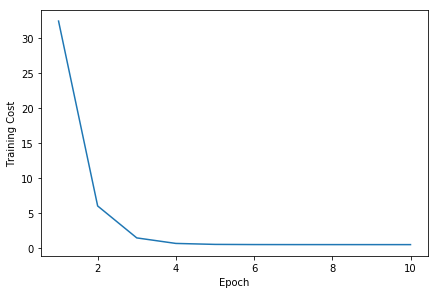

In [9]:
import matplotlib.pyplot as plt

plt.plot(range(1, len(training_costs) + 1), training_costs)
plt.tight_layout()
plt.xlabel('Epoch')
plt.ylabel('Training Cost')
plt.show()

As we can see in the following plot, this simple model converges very quickly after a few epochs. 

So far so good. Looking at the cost function, it seems that we built a working regression model from this particular dataset. Now, let's compile a new function to make predictions based on the input features. For this function, we need the TensorFlow session, the model, and the test dataset:

In [10]:
def predict_linreg(sess, model, X_test):
    y_pred = sess.run(model.z_net, 
                      feed_dict={model.X: X_test})
    return y_pred

Implementing a predict function was pretty straightforward; just running *z_net* defined in the graph computes the predicted output values. Next, let's plot the linear regression fit on the training data:

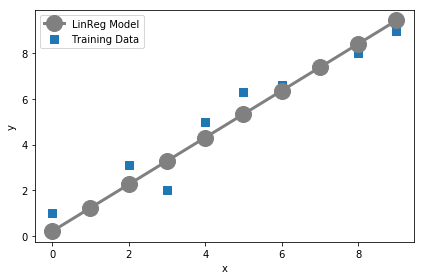

In [11]:
plt.scatter(X_train, y_train, marker='s', s=50, 
            label='Training Data')
plt.plot(range(X_train.shape[0]), 
         predict_linreg(sess, lrmodel, X_train), 
         color='gray', marker='o', markersize=16, 
         linewidth=3, label='LinReg Model')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.tight_layout()
plt.show()

As we can see in the resulting plot, our model fits the training data points appropriately. 